In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Data Naik.xlsx')
df

,t,Ta,Tb,T0,T1,T2,T3,T4,T5,T6,T7
0,1,27.50,27.82,25.46,27.07,27.71,27.39,27.71,27.39,27.07,27.07
1,2,27.50,28.02,25.46,26.75,27.39,27.39,27.71,27.39,27.07,27.39
2,3,27.00,28.02,25.46,27.07,27.39,27.39,27.71,27.39,27.07,27.07
3,4,27.25,28.02,25.46,27.07,27.39,27.39,27.71,27.39,27.07,27.39
4,5,26.75,28.43,25.46,27.07,27.71,27.39,27.71,27.39,27.07,27.07
...,...,...,...,...,...,...,...,...,...,...,...
564,565,37.75,78.11,51.56,57.04,55.43,39.64,36.42,37.71,35.77,33.19
565,566,38.00,78.11,51.56,57.04,55.43,39.64,36.42,37.38,35.77,33.19
566,567,38.00,78.11,51.56,57.04,55.43,39.64,36.42,37.38,35.77,32.87
567,568,38.00,77.91,51.56,57.04,55.75,39.64,36.42,37.38,36.09,33.19


In [4]:
# Bias
Bias = [2.566, 0.94, 0.604, 0.652, 0.428, 0.796, 0.988, 0.972]

# tambahkan bias sensor kedalam tiap data suhu
for i in range (0,8):
    df['T'+str(i)] = df['T'+str(i)] + Bias[i]

df

,t,Ta,Tb,T0,T1,T2,T3,T4,T5,T6,T7
0,1,27.50,27.82,28.026,30.576,29.254,28.646,28.79,28.614,28.854,29.03
1,2,27.50,28.02,28.026,30.256,28.934,28.646,28.79,28.614,28.854,29.35
2,3,27.00,28.02,28.026,30.576,28.934,28.646,28.79,28.614,28.854,29.03
3,4,27.25,28.02,28.026,30.576,28.934,28.646,28.79,28.614,28.854,29.35
4,5,26.75,28.43,28.026,30.576,29.254,28.646,28.79,28.614,28.854,29.03
...,...,...,...,...,...,...,...,...,...,...,...
564,565,37.75,78.11,54.126,60.546,56.974,40.896,37.50,38.934,37.554,35.15
565,566,38.00,78.11,54.126,60.546,56.974,40.896,37.50,38.604,37.554,35.15
566,567,38.00,78.11,54.126,60.546,56.974,40.896,37.50,38.604,37.554,34.83
567,568,38.00,77.91,54.126,60.546,57.294,40.896,37.50,38.604,37.874,35.15


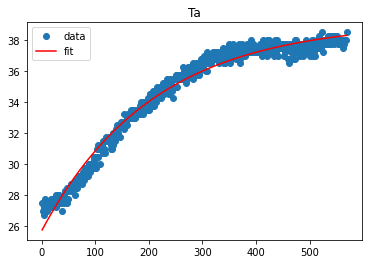

Parameter untuk Ta
k = 13.44648501829279
τ = 207.0462449725083
c = 25.711167233886506
tr = 454.92709809877095


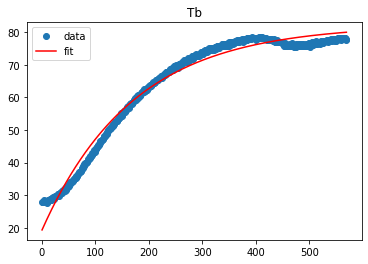

Parameter untuk Tb
k = 63.17425618537256
τ = 170.14826763457972
c = 19.01367127635782
tr = 373.8539554378794


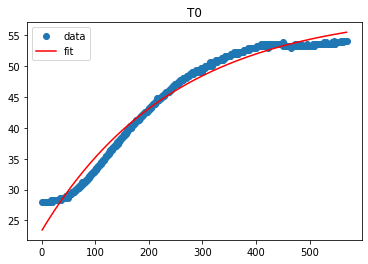

Parameter untuk T0
k = 35.72921310080522
τ = 247.7245145434946
c = 23.32839325954107
tr = 544.30639176365


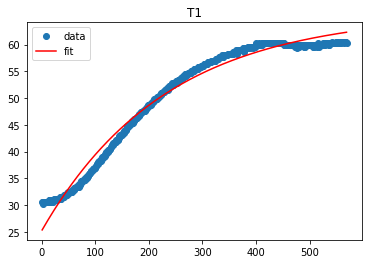

Parameter untuk T1
k = 40.561506016706794
τ = 231.80309400283141
c = 25.210786215998514
tr = 509.32345524559923


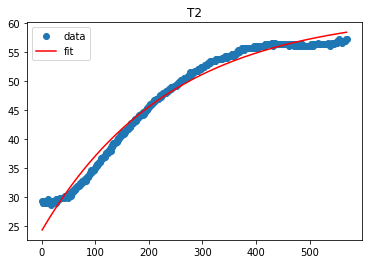

Parameter untuk T2
k = 37.74957532798961
τ = 238.94230924716194
c = 24.176897020121224
tr = 525.0099144433357


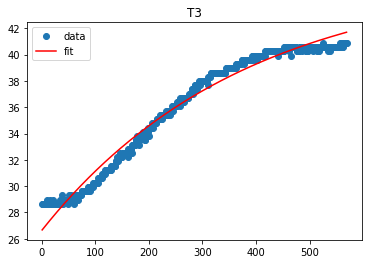

Parameter untuk T3
k = 19.350221344956875
τ = 377.10745805569604
c = 26.6247012054729
tr = 828.5897751367629


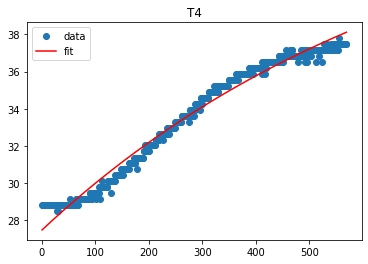

Parameter untuk T4
k = 19.617062228839025
τ = 723.9793550482326
c = 27.44265195396088
tr = 1590.7452323960017


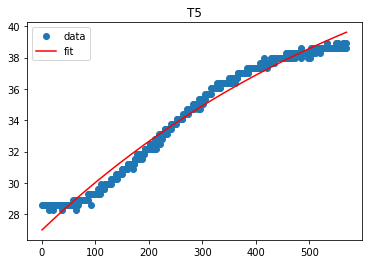

Parameter untuk T5
k = 22.4355561506738
τ = 686.1486405050634
c = 26.96811187356645
tr = 1507.6226566235596


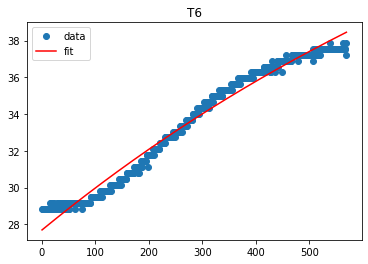

Parameter untuk T6
k = 27.820893384792925
τ = 1160.6283720105012
c = 27.67056266694371
tr = 2550.161184135198


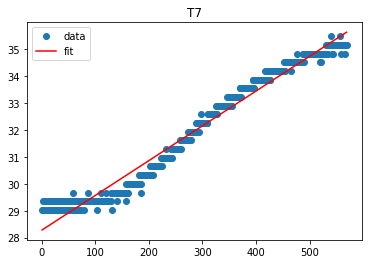

Parameter untuk T7
k = 400527.40857258043
τ = 30998029.03588459
c = 28.27240605369748
tr = 68109631.24662738


In [23]:
# kurva untuk fitting

def f(t,k,τ,c):
    return k*(1-np.exp(-(t)/τ)) + c

# import curve fit module
from scipy.optimize import curve_fit

# fit all data 
for i in range (0,2):
    
        t = df['t']
        y = df['T'+chr(97+i)]
    
        # initial guess
        k = 0.1
        τ = 1
        td = 0.1
    
        # fit
        popt, pcov = curve_fit(f, t, y, p0=[k, τ, td], method='dogbox') # kurva difit dengan memvariasikan parameter k, τ, dan c
    
        # plot
        plt.plot(t, y, 'o', label='data')
        plt.plot(t, f(t, *popt), 'r-', label='fit')
        plt.legend()
        plt.title('T'+chr(97+i))
        plt.show()
    
        # print parameter
        print('Parameter untuk T'+chr(97+i))
        print('k =', popt[0])
        print('τ =', popt[1])
        print('c =', popt[2])

        # calculate rise time
        tr = popt[1]*np.log(9)
        print('tr =', tr)

for i in range (0,8):

    t = df['t']
    y = df['T'+str(i)]

    # initial guess
    k = 0.1
    τ = 1
    td = 0.1

    # fit
    popt, pcov = curve_fit(f, t, y, p0=[k, τ, td], method='dogbox') # kurva difit dengan memvariasikan parameter k, τ, dan c

    # plot
    plt.plot(t, y, 'o', label='data')
    plt.plot(t, f(t, *popt), 'r-', label='fit')
    plt.legend()
    plt.title('T'+str(i))
    plt.show()

    # print parameter
    print('Parameter untuk T'+str(i))
    print('k =', popt[0])
    print('τ =', popt[1])
    print('c =', popt[2])

    # calculate rise time
    tr = popt[1]*np.log(9)
    print('tr =', tr)


